In [25]:
from src.modeling.cnn_vae import CNN_VAE
from src.data.df_dataset import DfDataset

import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import DataLoader
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [26]:
model = CNN_VAE.load_from_checkpoint(  
    "/Users/tobiaochsner/Documents/ETH/GeneticFitness/data/models/cnn_vae/epoch=44-val_loss=0.40.ckpt"
)

In [27]:
df = pd.read_csv("/Users/tobiaochsner/Documents/ETH/GeneticFitness/data/output/preprocessed.csv")
dataset = DfDataset(df, ["rna_loops"])
loader = DataLoader(dataset, batch_size=len(dataset))

In [28]:
all_items = next(iter(loader))
predictions = model(all_items)

In [29]:
input_embedding, output_embedding, mu, var = predictions

In [30]:
input_embedding

tensor([[[-0.6136, -0.6136, -0.6136,  ..., -0.6136, -0.6136, -0.6136],
         [ 0.0316,  0.0316,  0.0316,  ...,  0.0316,  0.0316,  0.0316],
         [-0.4927, -0.4927, -0.4927,  ..., -0.4927, -0.4927, -0.4927],
         ...,
         [-1.2341, -1.2341, -1.2341,  ..., -1.2341, -1.2341, -1.2341],
         [ 1.8197,  1.8197,  1.8197,  ...,  1.8197,  1.8197,  1.8197],
         [-0.5515, -0.5515, -0.5515,  ..., -0.5515, -0.5515, -0.5515]],

        [[-0.6136, -0.6136, -0.6136,  ..., -0.5692, -0.5692, -0.6136],
         [ 0.0316,  0.0316,  0.0316,  ...,  0.9200,  0.9200,  0.0316],
         [-0.4927, -0.4927, -0.4927,  ...,  1.1108,  1.1108, -0.4927],
         ...,
         [-1.2341, -1.2341, -1.2341,  ..., -0.9565, -0.9565, -1.2341],
         [ 1.8197,  1.8197,  1.8197,  ...,  0.0335,  0.0335,  1.8197],
         [-0.5515, -0.5515, -0.5515,  ...,  0.7101,  0.7101, -0.5515]],

        [[-0.6136, -0.6136, -0.6136,  ..., -0.6136, -0.6136, -0.6136],
         [ 0.0316,  0.0316,  0.0316,  ...,  0

In [31]:
mu = predictions[2]
mu = mu.detach().numpy()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

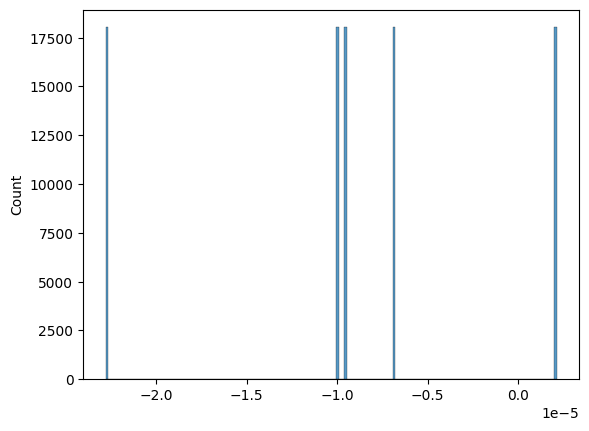

In [14]:
sns.histplot(mu.flatten())

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498:

KeyboardInterrupt: 

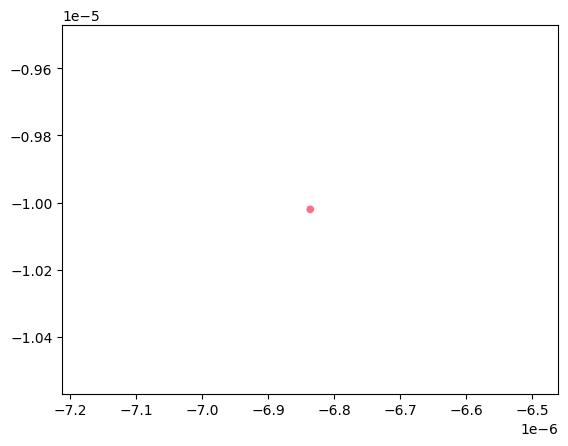

In [10]:
sns.scatterplot(x=mu[:, 0], y=mu[:, 1], hue=df.sequence_dna)

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

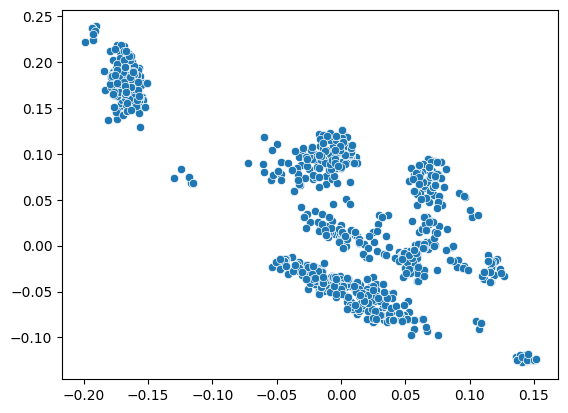

In [35]:
sns.scatterplot(x=mu[:, 0], y=mu[:, 4])

In [14]:
len(set(df.rna_loops))

780

In [24]:
list(model.parameters())[0].shape

torch.Size([3, 26])